In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
plt.rcParams['text.usetex'] = True
from IPython.display import display, Math

# Oscilador Armónico Amortiguado

El **oscilador armónico amortiguado** es un sistema físico que describe el movimiento de una partícula o cuerpo sometido a una fuerza restauradora proporcional al desplazamiento (como en un resorte) y a una fuerza de **amortiguamiento** (resistencia) proporcional a la velocidad.

## Ecuación de movimiento

La ecuación diferencial que lo gobierna es:

$$
m \ddot{x} + b \dot{x} + kx = 0
$$

donde:

* (m) = masa del oscilador
* (b) = coeficiente de amortiguamiento (resistencia viscosa)
* (k) = constante del resorte $k= mg/x_m$
* (x(t)) = desplazamiento en función del tiempo



## Frecuencias características

Se define la **frecuencia natural sin amortiguamiento**:

$$
\omega_0 = \sqrt{\frac{k}{m}}$$

y la **constante de amortiguamiento reducido**:

$$
\gamma = \frac{b}{2m}
$$

## Tipos de régimen

El comportamiento depende de la relación entre $\gamma$ y $\omega_0$:

1. **Subamortiguado** ($\gamma < \omega_0$)
   El sistema oscila con frecuencia reducida:
   $$
   \omega_d = \sqrt{\omega_0^2 - \gamma^2}
   $$
   Solución:
   $$
   x(t) = A e^{-\gamma t} \cos(\omega_d t + \phi)
   $$
   
   $$  
    \dot{x}(t) = -A e^{-\gamma t} \left[ \gamma \cos\left( \omega_d t + \phi \right) + \omega_d \sin\left( \omega_d t + \phi \right) \right]
   $$
   

2. **Amortiguamiento crítico** ($(\gamma = \omega_0)$)
   No hay oscilaciones, el sistema regresa a equilibrio lo más rápido posible sin oscilar:
   $$
   x(t) = (C_1 + C_2 t) e^{-\gamma t}
   $$

3. **Sobreamortiguado** ($\gamma > \omega_0$)
   El sistema no oscila, regresa lentamente al equilibrio:
   $$
   x(t) = C_1 e^{(-\gamma + \sqrt{\gamma^2 - \omega_0^2})t} + C_2 e^{(-\gamma - \sqrt{\gamma^2 - \omega_0^2})t}
   $$


In [5]:
# Datos
#  REsorte sin peso = 7 cm, resorte con dos pesos = 10.2 cm , Resorte en el agua  = 9 cm 
# Masa 1 = 68.8 gr , Masa 2 = 69.3 gr 

tiempo = np.array([
    1.000000, 1.033333, 1.066667, 1.100000, 1.133333, 1.166667, 1.200000,
    1.233333, 1.266667, 1.300000, 1.333333, 1.366667, 1.400000, 1.433333,
    1.466667, 1.500000, 1.533333, 1.566667, 1.600000, 1.633333, 1.666667,
    1.700000, 1.733333, 1.766667, 1.800000, 1.833333, 1.866667, 1.900000,
    1.933333, 1.966667, 2.000000, 2.033333, 2.066667, 2.100000, 2.133333,
    2.166667, 2.200000, 2.233333, 2.266667, 2.300000, 2.333333, 2.366667,
    2.400000, 2.433333, 2.466667, 2.500000, 2.533333, 2.566667, 2.600000,
    2.633333, 2.666667, 2.700000, 2.733333, 2.766667, 2.800000, 2.833333,
    2.866667, 2.900000, 2.933333, 2.966667, 3.000000, 3.033333, 3.066667,
    3.100000, 3.133333, 3.166667, 3.200000, 3.233333, 3.266667, 3.300000,
    3.333333, 3.366667, 3.400000, 3.433333, 3.466667, 3.500000, 3.533333,
    3.566667, 3.600000, 3.633333, 3.666667, 3.700000, 3.733333, 3.766667,
    3.800000, 3.833333, 3.866667, 3.900000, 3.933333, 3.966667, 4.000000,
    4.033333, 4.066667, 4.100000, 4.133333, 4.166667, 4.200000, 4.233333,
    4.266667, 4.300000, 4.333333, 4.366667, 4.400000, 4.433333, 4.466667,
    4.500000, 4.533333, 4.566667, 4.600000, 4.633333, 4.666667, 4.700000,
    4.733333, 4.766667, 4.800000, 4.833333, 4.866667, 4.900000, 4.933333,
    4.966667, 5.000000, 5.033333, 5.066667, 5.100000, 5.133333, 5.166667,
    5.200000, 5.233333, 5.266667, 5.300000, 5.333333, 5.366667, 5.400000,
    5.433333, 5.466667, 5.500000, 5.533333, 5.566667, 5.600000, 5.633333,
    5.666667, 5.700000, 5.733333, 5.766667, 5.800000, 5.833333, 5.866667,
    5.900000, 5.933333, 5.966667, 6.000000, 6.033333, 6.066667, 6.100000,
    6.133333, 6.166667, 6.200000, 6.233333, 6.266667, 6.300000, 6.333333,
    6.366667, 6.400000, 6.433333, 6.466667, 6.500000, 6.533333, 6.566667,
    6.600000, 6.633333, 6.666667, 6.700000, 6.733333, 6.766667, 6.800000
])-1

posicional = np.array([
    2.099734, 2.099734, 2.076664, 2.053593, 2.053593, 2.053593, 2.053593,
    2.053593, 2.053593, 2.053593, 2.053593, 2.053593, 1.845959, 1.845959,
    1.038494, 0.461733, -0.391873, -0.945564, -1.453113, -1.753029, -1.406972,
    -0.991704, -0.622577, -0.161169, 0.346381, 0.692437, 0.738578, 0.715508,
    0.623226, 0.207958, -0.184239, -0.530296, -0.830211, -0.991704, -1.107057,
    -1.107057, -1.014775, -0.830211, -0.484155, -0.161169, 0.138747, 0.277170,
    0.369451, 0.392522, 0.231029, 0.138747, -0.138098, -0.345732, -0.576437,
    -0.737930, -0.853282, -0.876352, -0.853282, -0.599507, -0.461084, -0.345732,
    -0.184239, 0.000324, 0.231029, 0.346381, 0.484804, 0.277170, 0.023395,
    -0.207310, -0.391873, -0.622577, -0.737930, -0.714859, -0.761000, -0.761000,
    -0.507225, -0.322662, -0.276521, -0.207310, -0.068887, 0.207958, 0.277170,
    0.323310, 0.323310, 0.138747, 0.023395, -0.091957, -0.207310, -0.345732,
    -0.484155, -0.530296, -0.484155, -0.484155, -0.368803, -0.276521, -0.115028,
    0.023395, 0.092606, 0.207958, 0.207958, 0.207958, 0.069536, -0.207310,
    -0.207310, -0.276521, -0.345732, -0.438014, -0.438014, -0.484155, -0.414944,
    -0.345732, -0.276521, -0.161169, -0.022746, 0.092606, 0.184888, 0.184888,
    0.184888, 0.184888, 0.023395, -0.161169, -0.414944, -0.414944, -0.461084,
    -0.368803, -0.368803, -0.345732, -0.299591, -0.276521, -0.184239, -0.184239,
    0.000324, 0.138747, 0.138747, 0.184888, 0.184888, 0.138747, 0.000324,
    -0.184239, -0.230380, -0.299591, -0.299591, -0.299591, -0.299591, -0.299591,
    -0.299591, -0.276521, 0.092606, 0.207958, 0.207958, 0.277170, 0.254099,
    0.115676, -0.022746, -0.115028, -0.138098, -0.207310, -0.207310, -0.230380,
    -0.230380, -0.230380, -0.230380, -0.230380, -0.207310, 0.092606, 0.300240,
    0.300240, 0.300240, 0.300240, 0.161817, -0.091957, -0.230380, -0.230380,
    -0.230380, -0.184239, -0.230380, -0.230380, -0.345732, -0.068887, 0.000324
])


velocidad_d = np.array([
    -1.38, -0.35, -0.69, -0.35, 0.00,
    0.00, 0.00, 0.00, 0.00, 0.00,
    0.00, -3.11, -3.11, -12.11, -20.76,
    -21.46, -21.11, -15.92, -12.11, 0.69,
    11.42, 11.77, 12.46, 14.53, 12.80,
    5.88, 0.35, -1.73, -7.61, -12.11,
    -11.07, -9.69, -6.92, -4.15, -1.73,
    1.38, 4.15, 7.96, 10.04, 9.34,
    6.58, 3.46, 1.73, -2.08, -3.81,
    -5.54, -7.27, -6.58, -5.88, -4.15,
    -2.08, 0.00, 4.15, 5.88, 3.81,
    4.15, 5.19, 6.23, 5.19, 3.81,
    -1.04, -6.92, -7.27, -6.23, -6.23,
    -5.19, -1.38, -0.35, -0.69, 3.81,
    6.58, 3.46, 1.73, 3.11, 6.23,
    5.19, 1.73, 0.69, -2.77, -4.50,
    -3.46, -3.46, -3.81, -4.15, -2.77,
    0.00, 0.69, 1.73, 3.11, 3.81,
    4.50, 3.11, 2.77, 1.73, 0.00,
    -2.08, -6.23, -4.15, -1.04, -2.08,
    -2.42, -1.38, -0.69, 0.35, 2.08,
    2.08, 2.77, 3.81, 3.81, 3.11,
    1.38, 0.00, 0.00, -2.42, -5.19,
    -6.58, -3.81, -0.69, 0.69, 1.38,
    0.35, 1.04, 1.04, 1.73, 1.38,
    2.77, 4.84, 2.08, 0.69, 0.69,
    -0.69, -2.77, -4.84, -3.46, -1.73,
    -1.04, 0.00, 0.00, 0.00, 0.00,
    0.35, 5.88, 7.27, 1.73, 1.04,
    0.69, -2.42, -4.15, -3.46, -1.73,
    -1.38, -1.04, -0.35, -0.35, 0.00,
    0.00, 0.00, 0.35, 4.84, 7.61,
    3.11, 0.00, 0.00, -2.08, -5.88,
    -5.88, -2.08, 0.00, 0.69, 0.00,
    -0.69, -1.73, 2.42, 5.19, 2.08
])

## Envolvente del oscilador armónico amortiguado
La envolvente está dada por:
$$
x_{\text{env}}(t) = \pm A e^{-\gamma t}
$$

In [7]:
# x_env 
def x_max(t, A0, gamma):
    """
    Calcula la amplitud máxima x_max de un oscilador armónico subamortiguado.
    
    Parámetros:
    t  : tiempo (float o array)
    A0 : amplitud inicial
    m  : masa
    b  : coeficiente de amortiguamien
    
    Retorna:
    x_max : amplitud máxima en el tiempo t
    """
    return A0 * np.exp(-gamma * (t))

# Trayectoria
def x(t, A0, gamma, omega_d, phi):
    return A0 * np.exp(-gamma * (t)) * np.cos(omega_d * t + phi)
# Velocidad 
def v(t, A0, gamma, omega_d, phi):
    return -A0 * gamma * np.exp(-gamma * t) * np.cos(omega_d * t + phi) - A0 * omega_d * np.exp(-gamma * t) * np.sin(omega_d * t + phi)


m =  138.1
k =  42336.28125
omega_0 =  17.50892629489313
gamma =  1.179
A =  3.142
phi =  0
omega_d= 17.469185985614786


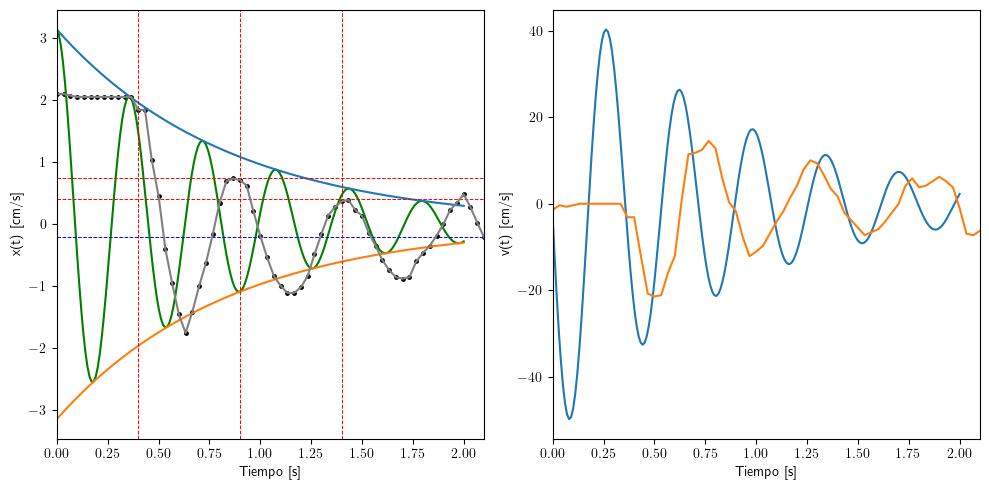

In [8]:
# Parámetros
m = 68.8+69.3   # masa gr 
print('m = ', m) #
k = (m*981)/3.2  # constante del resorte
print('k = ', k)
omega0 = np.sqrt(k/m)
print('omega_0 = ', omega0)
gamma = 1.179   # coeficiente de amortiguamiento # gamma = b / (2*m) (obtenemos gamma usando la relacion X_env)
print('gamma = ', gamma)
A0 = 3.142   # amplitud inicial cm
print('A = ', A0)
phi =  0 #1.444  # fase inicial
print('phi = ', phi)

# Parámetros derivados
omega_d = np.sqrt(omega0**2 - gamma**2)  # frecuencia amortiguada
print('omega_d=', omega_d)

# Rango de tiempo
t_fit = np.linspace(0, 2, 200)

posicion = x(t_fit, A0, gamma, omega_d, phi)
velocidad = v(t_fit, A0, gamma, omega_d, phi)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5), sharex=True)

ax1.plot(t_fit, posicion, c = 'green')
ax1.set_ylabel('x(t) [cm/s]')
ax1.set_xlabel('Tiempo [s]')
ax1.set_xlim(0,2.1)

ax2.plot(t_fit, velocidad)
ax2.set_ylabel('v(t) [cm/s]')
ax2.set_xlabel('Tiempo [s]')
ax2.plot(tiempo, velocidad_d)

ax1.plot(t_fit, x_max(t_fit, A0, gamma))
ax1.plot(t_fit, -x_max(t_fit, A0, gamma))
ax1.axhline(y=0.75, color='red', linestyle='--', lw = 0.7)
ax1.axhline(y=0.4, color='red', linestyle='--', lw = 0.7)
ax1.axhline(y=-0.2, color='blue', linestyle='--', lw = 0.7)

ax1.axvline(x=1.4, color='red', linestyle='--', lw = 0.7)
ax1.axvline(x=0.4, color='red', linestyle='--', lw = 0.7)
ax1.axvline(x=0.9, color='red', linestyle='--', lw = 0.7)
ax1.scatter(tiempo, posicional, s = 6, c = 'black')
ax1.plot(tiempo, posicional, c = 'grey')

ax1.grid(False)
plt.tight_layout()

plt.show()

# Debemos encortrar la curva que mejor ajuste a los datos

In [9]:
from scipy.optimize import curve_fit

A0 ajustado: 3.142
gamma ajustado: 1.179
omega_d ajustado: 17.469
phi ajustado: 1.444


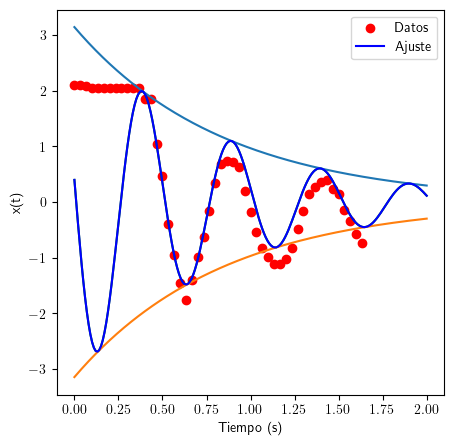

In [11]:
def x_t(t, A0, gamma, omega_d, phi):
    return  A0 * np.exp(-gamma * (t)) * np.cos(omega_d * (t) + phi)

# Ajuste usando curve_fit (Usamos solo los datos del 14 al 50)
popt, pcov = curve_fit(x_t, tiempo[14:50], posicional[14:50], p0 = [A0, gamma, omega_d, phi] )
A0_fit, gamma_fit, omega_d_fit, phi_fit = popt

print(f"A0 ajustado: {A0_fit:.3f}")
print(f"gamma ajustado: {gamma_fit:.3f}")
print(f"omega_d ajustado: {omega_d:.3f}")
print(f"phi ajustado: {phi_fit:.3f}")

t_fit = np.linspace(0, 2, 200)

# Graficar
fig, ax = plt.subplots(1, 1, figsize=(5,5), sharex=True)

plt.scatter(tiempo[0:50], posicional[0:50], color='red', label='Datos')
plt.plot(t_fit, x(t_fit, *popt), c = 'green')
plt.plot(t_fit, x_max(t_fit, A0_fit, gamma_fit))
plt.plot(t_fit, -x_max(t_fit, A0_fit, gamma_fit))
plt.plot(t_fit, x_t(t_fit, *popt), label='Ajuste', color='blue')
plt.xlabel("Tiempo (s)")
plt.ylabel("x(t)")
plt.legend()
plt.show()


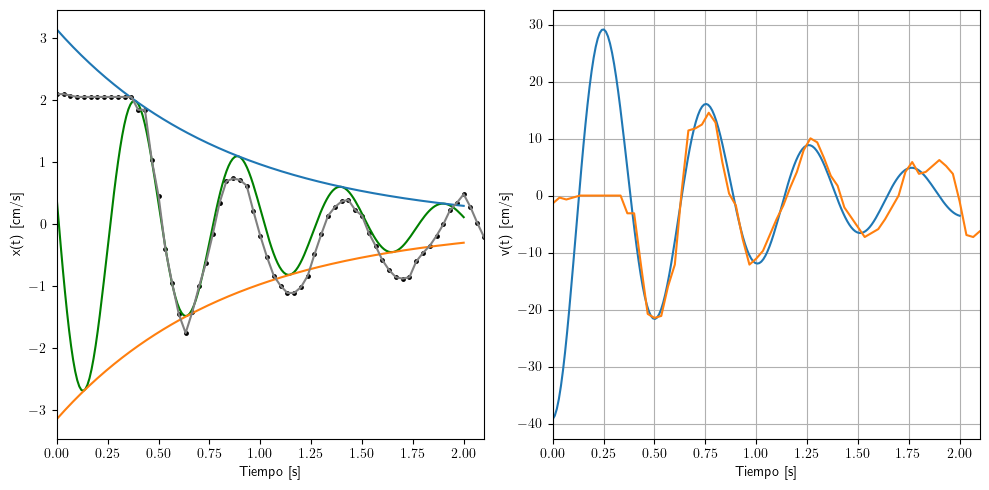

In [12]:
# Grafiquemos una vez más los puntos contra la curva teorica

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5), sharex=True)

ax1.plot(t_fit, x(t_fit, *popt), c = 'green')
ax1.set_ylabel('x(t) [cm/s]')
ax1.set_xlabel('Tiempo [s]')
ax1.set_xlim(0,2.1)
ax2.plot(t_fit, v(t_fit, *popt))
ax2.set_ylabel('v(t) [cm/s]')
ax2.set_xlabel('Tiempo [s]')
ax2.plot(tiempo, velocidad_d)
ax1.plot(t_fit, x_max(t_fit, A0_fit, gamma))
ax1.plot(t_fit, -x_max(t_fit, A0_fit, gamma))

ax1.scatter(tiempo, posicional, s = 6, c = 'black')
ax1.plot(tiempo, posicional, c = 'grey')
ax2.grid(True)
plt.tight_layout()

plt.show()

## Energía

Para el sistema sub-amortiguado: La energía total disminuye con el tiempo debido al trabajo de la fuerza de fricción:

$$
E(t) = \frac{1}{2} m \dot{x}^2 + \frac{1}{2} k x^2 \quad \propto \quad e^{-2\gamma t}
$$

--

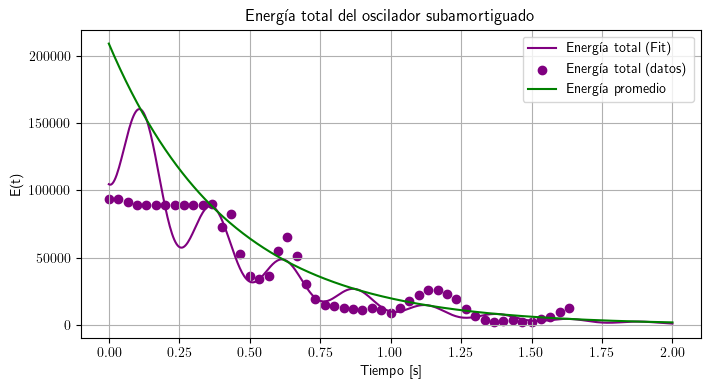

In [11]:
# Energia dependiente del tiempo
def E(t, A, gamma,omega_d, phi):
    x = A * np.exp(-gamma*t) * np.cos(omega_d*t - phi)
    v = -A * np.exp(-gamma*t) * (gamma*np.cos(omega_d*t - phi) + omega_d*np.sin(omega_d*t - phi))
    return 0.5*m*v**2 + 0.5*k*x**2

# Energia promedio 
def E_promedio(t, k, A, gamma):
    E0 = 0.5 * k * A**2
    return E0 * np.exp(-2 * gamma * t)


# --- Tiempo ---
t = np.linspace(0, 2, 500)

# --- Graficar ---
plt.figure(figsize=(8,4))
plt.plot(t, E(t, A0_fit, gamma_fit, omega_d_fit, phi_fit), color='purple', label='Energía total (Fit)')
plt.scatter(tiempo[0:50], 0.5*m*velocidad_d[0:50]**2 + 0.5*k*posicional[0:50]**2, color='purple', label='Energía total (datos)')
plt.plot(t, E_promedio(t, k, A0_fit, gamma_fit), color='green', label='Energía promedio')
plt.xlabel('Tiempo [s]')
plt.ylabel('E(t)')
plt.title('Energía total del oscilador subamortiguado')
plt.grid(True)
plt.legend()
plt.show()